In [1]:
#importing packages
import pandas as pd
import numpy as np
!pip install missingno
import missingno as msno

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
!pip install cufflinks
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

#preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter



In [2]:
#dataset
data = pd.read_csv("city_day.csv")
data['Date'] = pd.to_datetime(data['Date'])

data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [4]:
#unique values
for i in data.columns:
    print('column name:{}    unique values:{}'.format(i,len(data[i].unique())))

column name:City    unique values:26
column name:Date    unique values:2009
column name:PM2.5    unique values:11717
column name:PM10    unique values:12572
column name:NO    unique values:5777
column name:NO2    unique values:7405
column name:NOx    unique values:8157
column name:NH3    unique values:5923
column name:CO    unique values:1780
column name:SO2    unique values:4762
column name:O3    unique values:7700
column name:Benzene    unique values:1874
column name:Toluene    unique values:3609
column name:Xylene    unique values:1562
column name:AQI    unique values:830
column name:AQI_Bucket    unique values:7


In [5]:
#missing values
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
#imputing missing values
# Replacing numerical missing values with mean and categorical with mode
data['PM2.5']=data['PM2.5'].fillna(data['PM2.5'].mean())
data['PM10']=data['PM10'].fillna(data['PM10'].mean())
data['NO']=data['NO'].fillna(data['NO'].mean())
data['NO2']=data['NO2'].fillna(data['NO2'].mean())
data['NOx']=data['NOx'].fillna(data['NOx'].mean())
data['NH3']=data['NH3'].fillna(data['NH3'].mean())
data['CO']=data['CO'].fillna(data['CO'].mean())
data['SO2']=data['SO2'].fillna(data['SO2'].mean())
data['O3']=data['O3'].fillna(data['O3'].mean())
data['Benzene']=data['Benzene'].fillna(data['Benzene'].mean())
data['Toluene']=data['Toluene'].fillna(data['Toluene'].mean())
data['Xylene']=data['Xylene'].fillna(data['Xylene'].mean())
data['AQI']=data['AQI'].fillna(data['AQI'].mode()[0])
data['AQI_Bucket']=data['AQI_Bucket'].fillna('Moderate')


In [7]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,102.0,Moderate
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,102.0,Moderate
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,102.0,Moderate
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,102.0,Moderate
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,102.0,Moderate


In [8]:
# how much is the average amount of pollution in each city stations
most_polluted = data[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM10,CO
City,,,
Ahmedabad,334.485814,117.409318,16.147420
Delhi,258.703833,228.413747,1.976053
Lucknow,211.276755,118.127103,2.131976
Patna,210.979010,119.013316,1.591700
Gurugram,208.550923,150.467320,1.321857
Talcher,155.490811,156.552639,1.911862
Jorapokhar,139.759624,142.240508,1.358846
Guwahati,139.579681,116.604900,0.738284
Brajrajnagar,138.699360,123.094114,1.870288


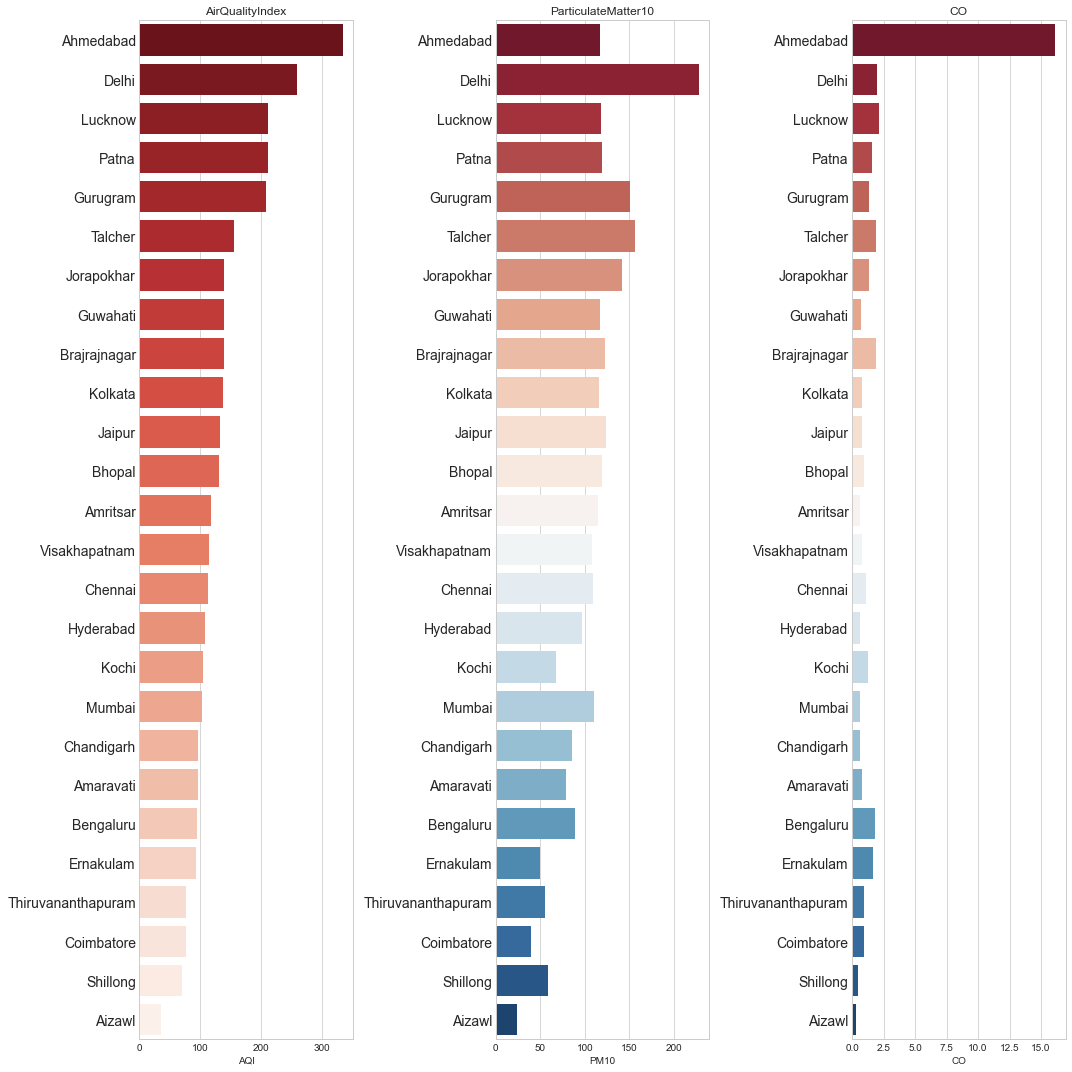

In [9]:

plt.style.use('seaborn-whitegrid')
f, ax_ = plt.subplots(1, 3, figsize = (15,15))

bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['AirQualityIndex', 'ParticulateMatter10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')   
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 14);
    ax_[i].set_title(titles[i])
    f.tight_layout()
    plt.savefig('test.png', bbox_inches='tight')


In [10]:
#categorize the pollutants into industrial
df1=data.copy()
df1['Vehicle_Pollution_content']=df1['PM2.5']+df1['PM10']+df1['NO']+df1['NOx']+df1['NH3']+df1['CO']
df1['Industry_pollutants']=df1['SO2']+df1['O3']+df1['Benzene']+df1['Toluene']+df1['Xylene']
df1.drop(['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene'],axis=1,inplace=True)
df1.head()

,City,Date,AQI,AQI_Bucket,Vehicle_Pollution_content,Industry_pollutants
0,Ahmedabad,2015-01-01,102.0,Moderate,228.051157,161.02
1,Ahmedabad,2015-01-02,102.0,Moderate,227.461157,71.56
2,Ahmedabad,2015-01-03,102.0,Moderate,273.561157,85.22
3,Ahmedabad,2015-01-04,102.0,Moderate,230.431157,70.24
4,Ahmedabad,2015-01-05,102.0,Moderate,291.021157,107.32


In [11]:
def max_bar_plot(var):
    x1 = df1[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

p1 = max_bar_plot('Industry_pollutants')
p2 = max_bar_plot('Vehicle_Pollution_content')
plt.savefig('test3.png')

<Figure size 432x288 with 0 Axes>

In [12]:
def min_bar_plot(var):
    x1 = df1[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Industry_pollutants')
p2 = min_bar_plot('Vehicle_Pollution_content')


In [13]:
#segregating dates into months and years

df1['Month']=df1.Date.dt.month.astype(str)
df1['Year']=df1.Date.dt.year.astype(str)

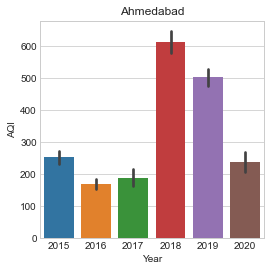

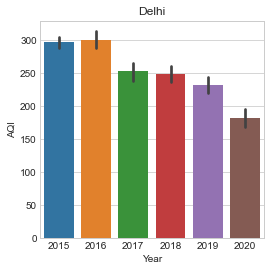

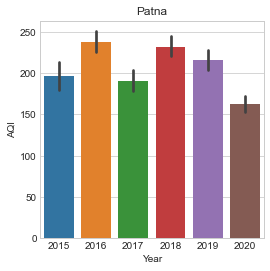

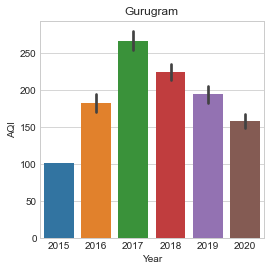

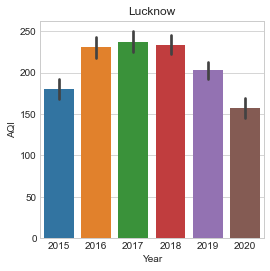

In [14]:
#plotting the average AQI over the years for top 5 cities which have AQI greater than 500

df1['City'][df1['AQI']>=500].value_counts()

cols=['Ahmedabad','Delhi','Patna','Gurugram','Lucknow']

for col in cols:
    plt.figure(figsize=(4,4))
    #selecting data pertaining to the selected city
    x=df1[df1['City']==col]
    sns.barplot(x='Year',y='AQI',data=x)
    plt.title(col)

Text(0.5, 1.0, 'Correlation Analysis')

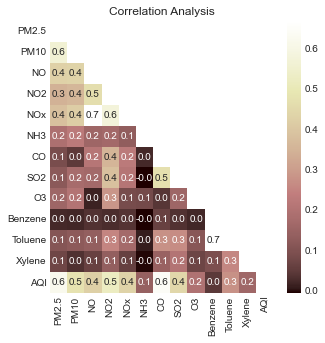

In [15]:
#correlation analysis

plt.figure(figsize=(5,5))

mask=np.triu(data.corr(method='pearson'))
sns.heatmap(data.corr(method='pearson'),
            annot=True,fmt='0.1f',
            mask=mask,
            robust=True,
            cmap='pink')
plt.title('Correlation Analysis')

C:\Users\nilak\AppData\Local\Temp\ipykernel_10808\1415044505.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Text(0.5, 0, 'Features')

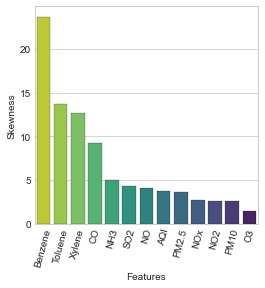

In [16]:
#analyzing skewness in data
#here we observe high skewness in Bezene,Toluene,CO and Xylene

skew=pd.DataFrame(data.skew().sort_values(ascending=False))
skew.columns=['Skewness']

plt.figure(figsize=(4,4))
plt.xticks(rotation=75)
sns.barplot(x=skew.index,y='Skewness',data=skew,
            edgecolor='black',
            linewidth=0.2,
            palette='viridis_r')
plt.xlabel('Features')

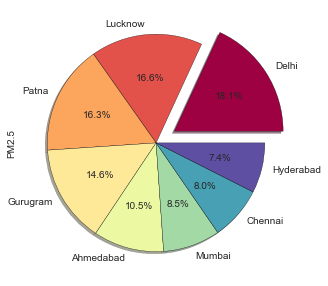

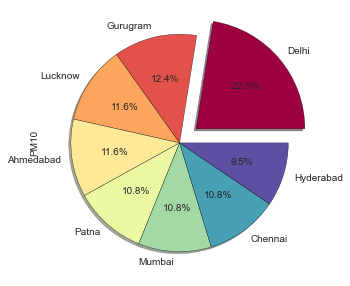

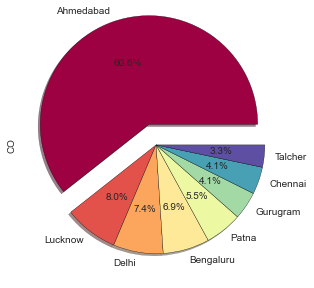

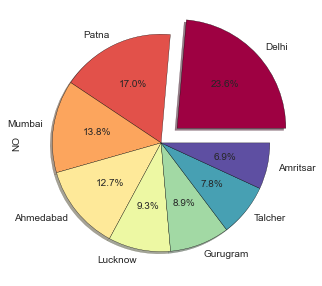

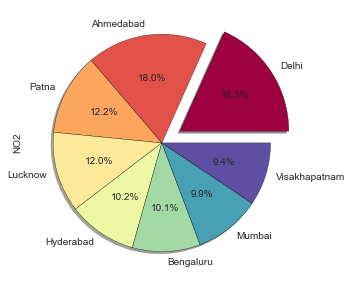

In [17]:
#cols represent particulate matter Carbon monoxide which have a correlation >=0.5 with AQI and thus 
#are responsible of increasing AQI of cities
cols=['PM2.5','PM10','CO','NO','NO2']

cmap=plt.get_cmap('Spectral')
color=[cmap(i) for i in np.linspace(0,1,8)]
explode=[0.2,0,0,0,0,0,0,0]

for col in cols:
    plt.figure(figsize=(5,5))
    
    '''grouping above columns by cities and 
    taking 8 cities which have the highest sum'''
    
    x=data.groupby('City')[col].sum().sort_values(ascending=False)
    x.reset_index('City')
    x[:8].plot.pie(shadow=True,autopct='%1.1f%%',
                   colors=color,explode=explode,
                   wedgeprops={'edgecolor':'black','linewidth':0.3}
                   )
    plt.savefig('test2.png', bbox_inches='tight')

<AxesSubplot:xlabel='Count'>

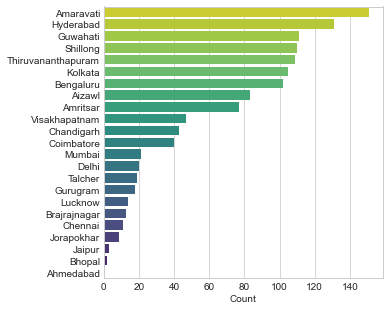

In [18]:
'''bar plot illustrating which of the cities have AQI less 
  than 50 and plotting their value count.From this we can infer which of the cities 
   have a relatively good air quality'''

x=pd.DataFrame(data['City'][data['AQI']< 50].value_counts())
x=x.rename(columns={'City':'Count'})

plt.figure(figsize=(5,5))
sns.barplot(x='Count',y=x.index,data=x,palette='viridis_r')

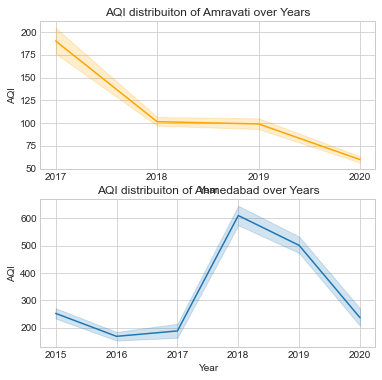

In [19]:
#AQI of least  and most polluted cities over the years
x=df1[df1['City']=='Amaravati']
x1=df1[df1['City']=='Ahmedabad']


plt.style.use('seaborn-whitegrid')
fig,ax=plt.subplots(2,1)
fig.set_size_inches(6,6)
ax[0]=sns.lineplot(x='Year',y='AQI',data=x,ax=ax[0],color='orange')
ax[1]=sns.lineplot(x='Year',y='AQI',data=x1,ax=ax[1])
ax[0].set_title('AQI distribuiton of Amravati over Years')
ax[1].set_title('AQI distribuiton of Ahmedabad over Years')
plt.savefig('test1.png', bbox_inches='tight')
    